Ici nous allons effectuer plusieurs segmentations avec des combinaisons différentes de colonnes de notre jeu de données. L'objectif ici est d'implémenter de la meilleure des manières les segmentations nous permettant donc d'avoir des regroupements pertinents de données, afin d'avoir une meilleure connaissance client. 
A noter que généralement les résultats issus de la segmentation permettent par la suite d'effectuer un scoring client.

In [0]:
import pandas as pd 
import numpy as np

Connaissance de notre jeu de donneés (nombre de lignes/colonnes, types des colonnes, statistiques descriptives etc...)

In [0]:
data = pd.read_csv('Mall_Customers.csv', sep=';')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
data.shape

(200, 5)

In [0]:
data.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace=True)

In [0]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
data_prep = data.copy()

In [0]:
data_prep.drop('CustomerID', axis=1, inplace=True)

In [0]:
from sklearn.preprocessing import StandardScaler

# Variables utilisées pour notre segmentation
segmentation_columns = ['Age', 'Spending Score']
X_segmentation = data_prep[segmentation_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_segmentation)

Ici pour déterminer quel est le nombre optimal de cluster à déterminer selon notre jeu de données et les colonnes de segmentations choisis, nous allons utiliser la méthode Elbow. Cette méthode consiste à implémenter un modèle K-means sur des valeurs arbitraires de K et à chaque étape calculer la somme de l'inertie (qui est la distance intra cluster). L'objectif est d'établir pour quelle nombre de cluster nous avons l'inertie la plus faible.

In [0]:
# Méthode Elbow 
from sklearn.cluster import KMeans

inertie = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    inertie_iteration=kmeans.inertia_
    inertie.append(inertie_iteration)
inertie

[399.9999999999999,
 189.38749033992428,
 124.33553836009898,
 89.84853511210657,
 71.71274285746934,
 64.06175779145904,
 53.789762208580754,
 40.24747167971792,
 33.77424724609489]

Text(0, 0.5, 'Inertie')

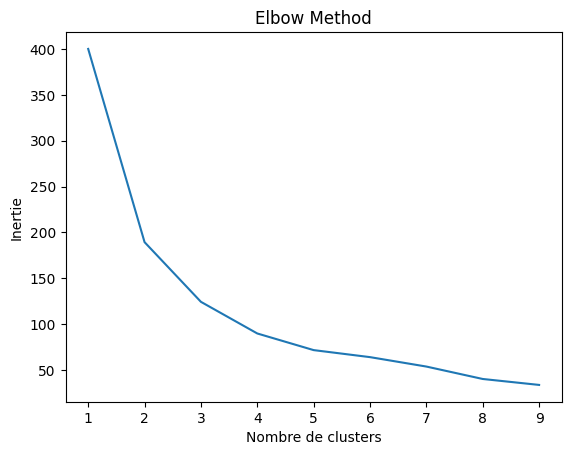

In [0]:
# On souhaite visualier l'évolution de notre inertie

import matplotlib.pyplot as plt 
import seaborn as sns  

plt.plot(nombre_clusters, inertie)
plt.title('Elbow Method')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

Après visualisation de l'évolution de notre inertie on détermine que le nombre optimal de clusters ici est de 5. Car c'est le nombre où la courbe commence à ralentir plus doucement ce qui signifie que c'est le nombre de clusters qui nous permet d'avoir assez de clusters avec des similitudes importantes entres eux et une dissimilarité avec les autres regroupements.

In [0]:
# Implémentation de notre K-means 
# On choisit donc grâce à la méthode Elbow de prendre 5 clusters 

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [0]:
data_clusters = data_prep.copy()
data_clusters['Clusters'] = kmeans.fit_predict(X_scaled) 
data_clusters.head()

,Gender,Age,Annual Income,Spending Score,Clusters
0,Male,19,15,39,2
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,2


Text(0, 0.5, 'Spending Score')

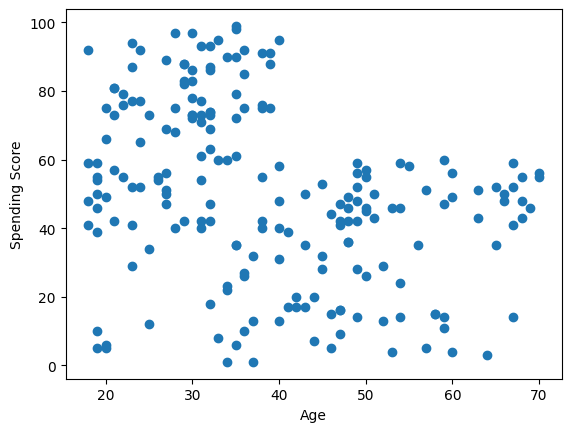

In [0]:
# Avant La clusterisation 

plt.scatter(data_prep['Age'],data_prep['Spending Score'])
plt.xlabel('Age')
plt.ylabel('Spending Score')

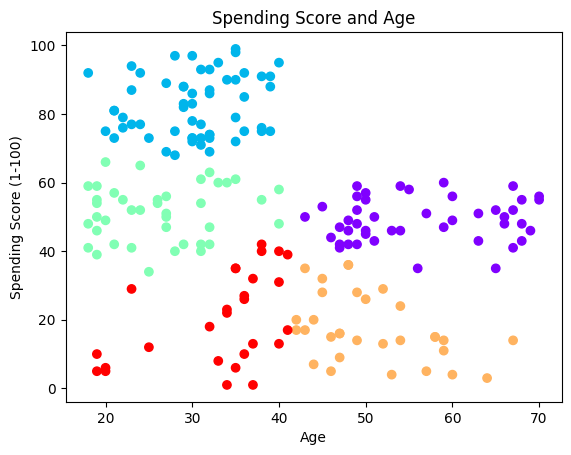

In [0]:
# Après clusterisation 

plt.scatter(data_prep['Age'],data_prep['Spending Score'], c=data_clusters['Clusters'], cmap='rainbow')
plt.title('Spending Score and Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

On répète le même processus ici sur les colonnes 'Spending Score' et 'Annual Income'

In [0]:
# Variables utilisées pour notre segmentation
segmentation_columns_2 = ['Spending Score', 'Annual Income']
X2_segmentation = data_prep[segmentation_columns_2]

X2_scaled = scaler.fit_transform(X2_segmentation)

In [0]:
# Méthode Elbow 

inertie2 = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X2_scaled)
    inertie_iteration=kmeans.inertia_
    inertie2.append(inertie_iteration)
inertie2

[400.00000000000006,
 273.66888662642015,
 195.24663019079156,
 108.92131661364358,
 65.56840815571681,
 60.16301291699051,
 50.10739221999537,
 42.45506145113594,
 32.49508119910091]

Text(0, 0.5, 'Inertie')

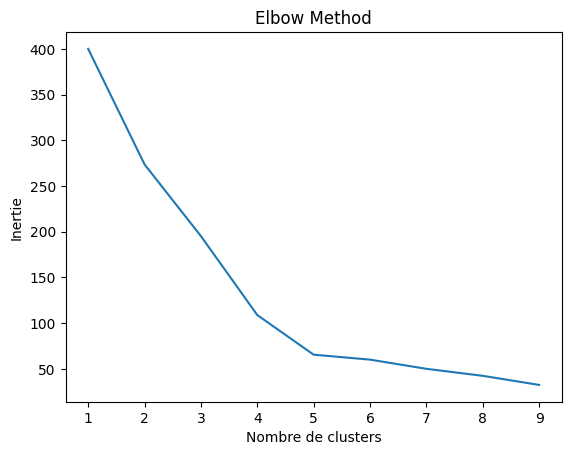

In [0]:
plt.plot(nombre_clusters, inertie2)
plt.title('Elbow Method')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

In [0]:
# Implémentation du K-Means
# On choisit comme précédemment 5 clusters

kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit(X2_scaled)

KMeans(n_clusters=5, random_state=42)

In [0]:
data_clusters2 = data_prep.copy()
data_clusters2['Clusters'] = kmeans2.fit_predict(X2_scaled) 
data_clusters2.head()

,Gender,Age,Annual Income,Spending Score,Clusters
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


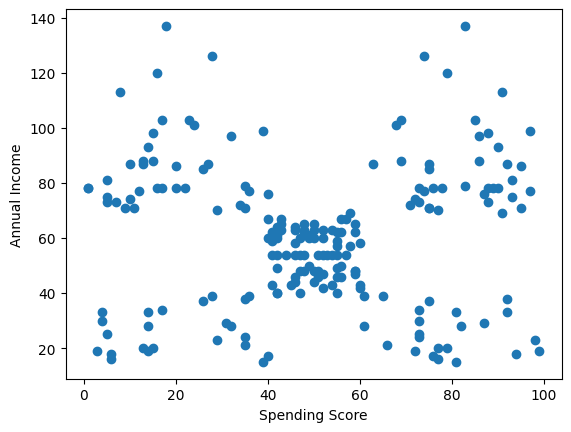

In [0]:
# Avant clusterisation 

plt.scatter(data_prep['Spending Score'],data_prep['Annual Income'])
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

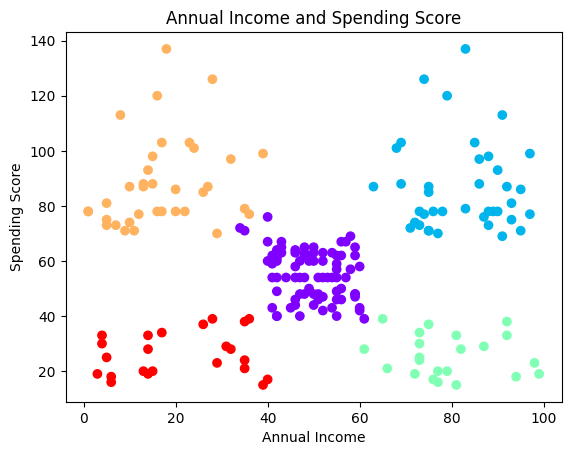

In [0]:
# Après clusterisation

plt.scatter(data_prep['Spending Score'],data_prep['Annual Income'], c=data_clusters2['Clusters'], cmap='rainbow')
plt.title('Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

On répète le même processus ici sur les colonnes 'Age' et 'Annual Income'

In [0]:
# Variables utilisées pour notre segmentation
segmentation_columns_3 = ['Age', 'Annual Income']
X3_segmentation = data_prep[segmentation_columns_3]

X3_scaled = scaler.fit_transform(X3_segmentation)

In [0]:
# Méthode Elbow 

inertie3 = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X2_scaled)
    inertie_iteration=kmeans.inertia_
    inertie3.append(inertie_iteration)
inertie3

[400.00000000000006,
 276.56139742364496,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.37581558455637,
 51.070410971489366,
 38.859813261413784,
 35.51332172343664]

Text(0, 0.5, 'Inertie')

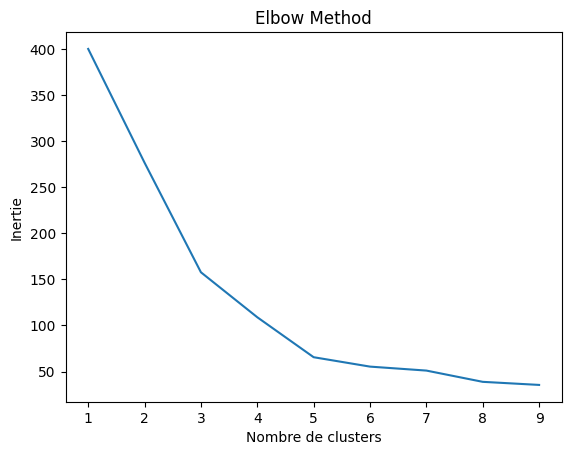

In [0]:
# On souhaite visualier l'évolution de notre inertie

plt.plot(nombre_clusters, inertie3)
plt.title('Elbow Method')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

In [0]:
# Implémentation du K-Means
# On choisit comme précédemment 5 clusters

kmeans3 = KMeans(n_clusters=5, random_state=42)
kmeans3.fit(X3_scaled)

KMeans(n_clusters=5, random_state=42)

In [0]:
data_clusters3 = data_prep.copy()
data_clusters3['Clusters'] = kmeans3.fit_predict(X3_scaled) 
data_clusters3.head()

,Gender,Age,Annual Income,Spending Score,Clusters
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


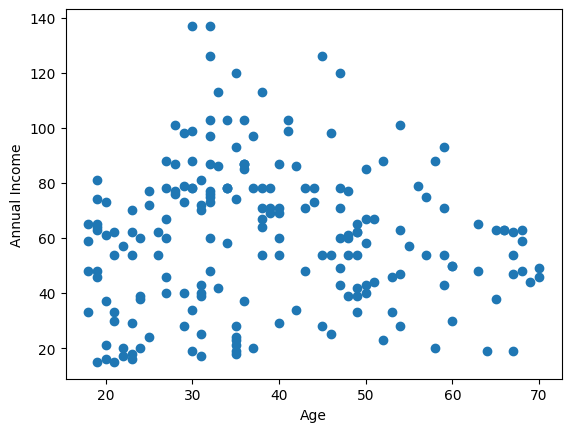

In [0]:
# Avant clusterisation 

plt.scatter(data_prep['Age'],data_prep['Annual Income'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

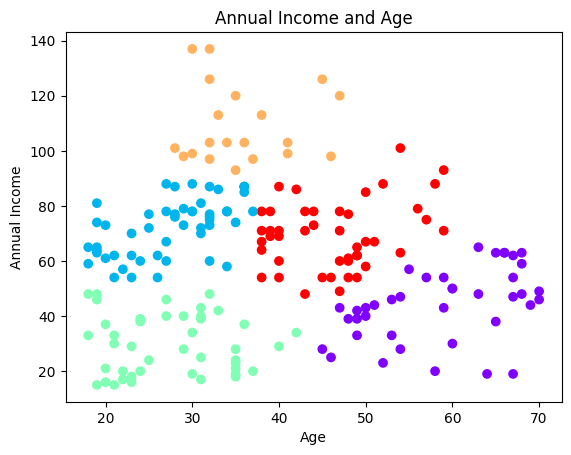

In [0]:
# Après clusterisation 

plt.scatter(data_prep['Age'],data_prep['Annual Income'], c=data_clusters3['Clusters'], cmap='rainbow')
plt.title('Annual Income and Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()